In [57]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools


In [58]:
# Reading the dataset.
data = pd.read_excel('Sample - Superstore.xls')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [59]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [60]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [61]:
set(data['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

Data Preprocessing

In [64]:
#We shall first analyse the time series of Furniture Sales followed by other categories.


furniture = data.loc[data['Category'] == 'Furniture']

# This shows that we have time-series data of 4 years for furniture sales.
print(furniture['Order Date'].min())
furniture['Order Date'].max()

2014-01-06 00:00:00


Timestamp('2017-12-30 00:00:00')

In [65]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
        'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

In [66]:
# furniture data
furniture.sort_values('Order Date')
furniture.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [67]:
#furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [68]:
#Indexing time-series data
furniture = furniture.set_index('Order Date')
#furniture = furniture.apply(lambda x: x.set_index('Order Date'))
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [69]:
# Averaging Daily Sales
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

# Furniture data time-series visualization

Text(0, 0.5, 'No of orders-furniture')

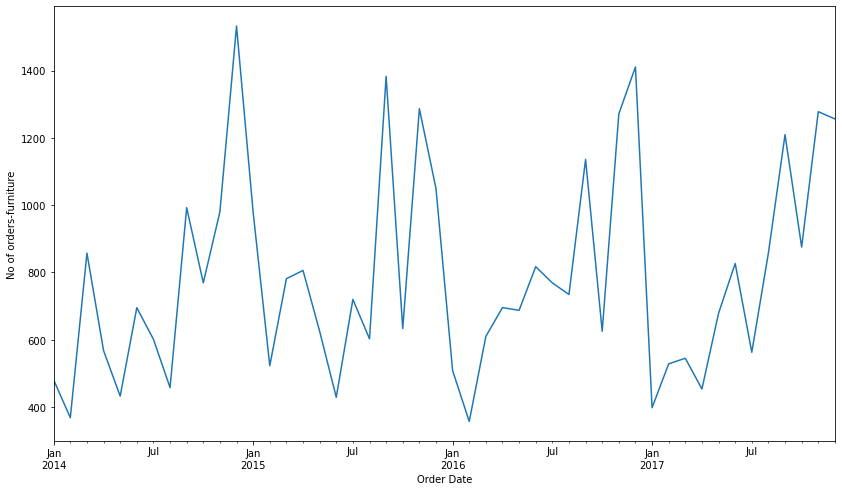

In [70]:
y.plot(figsize=(14, 8))
plt.ylabel('No of orders-furniture')

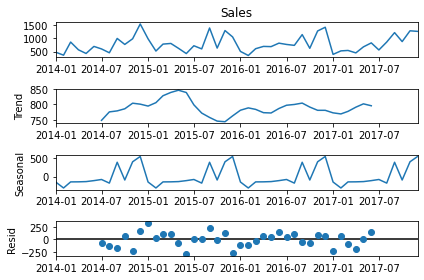

In [71]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

The above plot shows that the sales of furniture is highly unstable with seasonality and trend easily observable.

Time Series forecasting with ARIMA Model
ARIMA models are donated with the notation: ARIMA (p, d, q) where:

p denotes seasonality
d denotes trend
q denotes noise in data
Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal components of the series.

Trend Components:

p denotes Trend autoregression order
d denotes Trend difference order
q denotes Trend moving average order

Seasonality Components:

p denotes Seasonal autoregressive order.
d denotes Seasonal difference order.
q denotes Seasonal moving average order.
m denotes the number of time steps for a single seasonal period.

In [72]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)
Now that we've generated all possible parameters for our SARIMA model, we shall find out the best parameter to train the model on it finally. :)

SARIMA stands for Seasonal AutoRegressive Integrated Moving Average model which is an extension of ARIMA model used in modeling the seasonality component as well. So, we need not to make time-series stationary (non-seasonal) first before forecasting.

In [73]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205915


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1576.7262413607714
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.71701309202774
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:302.27028997937504
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.23144334183365


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1485.0473992603902
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:304.2488280302272
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.9252270758113


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2672.1798279894256
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.56074298091625
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:291.62613896732887


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.55877541496324


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2617.7294167313403
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.9884876946868
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:291.87255765940466
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.894766843944


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1378.3751901717778
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:486.63785672412575
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:304.96712281679663
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:497.78896630044073


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1012.3977101280059
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:306.911320015139
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:649.9056176816974


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2092.765960533169
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:458.87055484827295
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:279.5806233332879
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:486.18329774426724
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2589.5715149048433
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:310.7574368417265
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:281.55766214612464
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:692.1645522067713


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1489.3824305125393
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:304.20776751609566
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:480.9259367935185


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1180.181450845156
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:304.46646750845895
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:304.58426921438866
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:665.7794442186371


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:506.3735408778491
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:468.3685195815138
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:293.3422193965891
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:482.5763323876798


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:2527.322017486585
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:306.0156002125325
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:293.7513188157123
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:671.2513547541902


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:949.0188144758088
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:300.21306116190965
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:475.3403658785116
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1360.831449309516
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:300.62709013453866
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:302.326499250453
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:649.0318019835107


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1340.229565667295
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:460.47626876105824
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:281.38730069394035
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:469.5250354660849


C:\Users\Binu Jacob\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1885.170320179554
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:297.78754395388984
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:283.3661017479595


We got the lowest AIC value: 281.387 for ARIMA(1, 1, 1)x(0, 1, 1, 12). We shall use these best params in our model.

Here, the Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

AIC estimates the relative amount of information lost by a given model: the less information a model loses (less AIC value), the higher the quality of that model

In [74]:
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0836      0.243      0.344      0.731      -0.392       0.560
ma.L1         -1.0000   1486.265     -0.001      0.999   -2914.025    2912.025
ma.S.L12      -1.0001   1486.284     -0.001      0.999   -2914.062    2912.062
sigma2       2.68e+04      0.037   7.31e+05      0.000    2.68e+04    2.68e+04


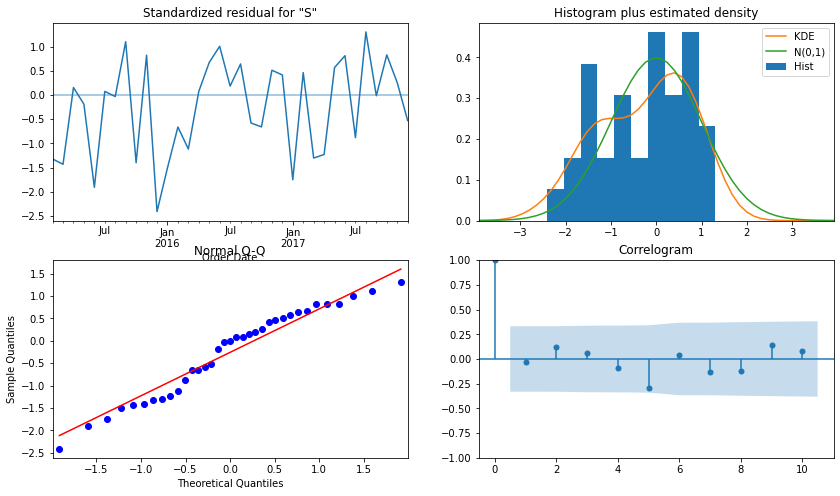

In [75]:
results.plot_diagnostics(figsize=(14, 8))
plt.show()

The above plots suggest that the Model Residuals are nearly Normally Distributed.

Validating the model forecasts
To validate the model results, we compare the actual sales with the predicted sales of the time series data starting from 2017/01/01 till the end of the data.

            lower Sales  upper Sales
Order Date                          
2017-01-01   356.170420  1142.156629
2017-02-01    46.666504   825.337594
2017-03-01   415.051676  1189.991163
2017-04-01   309.645217  1081.501935
2017-05-01   182.021965   951.290630
2017-06-01   283.803215  1050.868439
2017-07-01   352.168482  1117.335087
2017-08-01   221.887371   985.401171
2017-09-01   831.506336  1593.569692
2017-10-01   333.976693  1094.768658
2017-11-01   848.358381  1608.119309
2017-12-01   979.263590  1738.181536


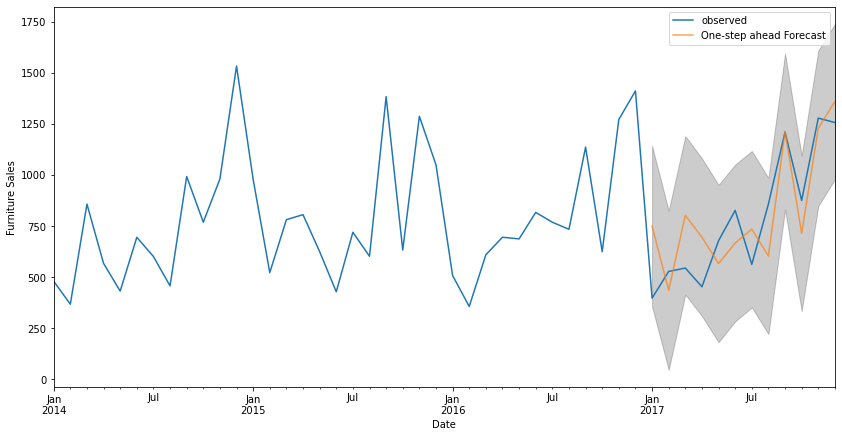

In [76]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot demonstrates that the predicted values alligns well with the true values capturing an upward seasonality. Now, we calculate the Mean Square Error of our predicted values wrt the orignal values.

In [77]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 35686.3215


In [78]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 188.90823567902234


# Future Forecasts


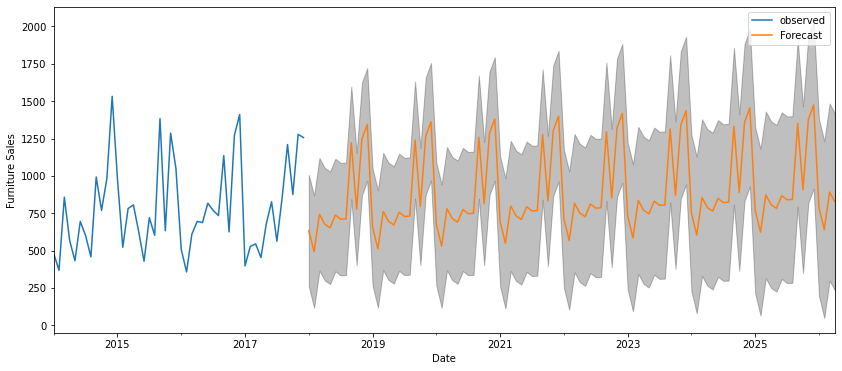

In [79]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Here, note that the confidence interval is increasing as we move further into the future. The model becomes less confident in predicting the values as we move ahead.

Our data has 3 categories: 'Furniture', 'Office Supplies' and, 'Technology'. Let's compare the 'Furniture' and 'Office Supplies' time series.

# Furniture vs Office Supplies

In [80]:
furniture = data.loc[data['Category'] == 'Furniture']
office = data.loc[data['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [81]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

C:\Users\Binu Jacob\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now, let's merge both the time series for comparison.

In [82]:
store = furniture.merge(office, on='Order Date', how='inner')
store.rename(columns={'Sales_x': 'Furniture Sales', 'Sales_y': 'Office Sales'}, inplace=True)
store.head()

,Order Date,Furniture Sales,Office Sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


# Visualizing Furniture vs Office Sales time series

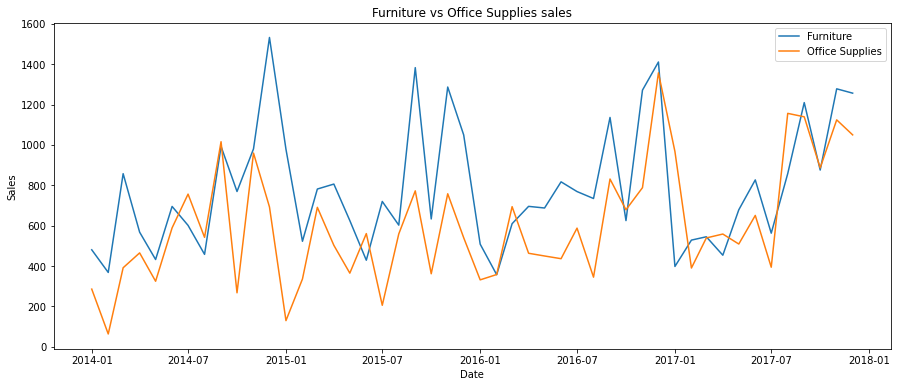

In [83]:
plt.figure(figsize=(15, 6))
plt.plot(store['Order Date'], store['Furniture Sales'], label='Furniture')
plt.plot(store['Order Date'], store['Office Sales'], label='Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies sales')
plt.legend()

Few Observations:
Both furniture and office supplies exhibit similar seasonality component.
The sales are generally low at the beginning of every year. This is evident from the decreasing line slope at the onset of year 2014, 2015, 2016 etc.
Also, monthly average sales of furniture is higher than that of office supplies. This might be due to the fact thta cost of furniture is much more as compared to office utilities.
But there are few instances in the time series where office supply sales surpass furniture sales. It is mainly in July 2014 for the first time in the dataset.